# 1. Importing libraries & loading dataset

In [1]:
import numpy as np
import pandas as pd
import os
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
os.chdir(r'C:\Users\BAO HAN\Downloads\Onyx Data - DataDNA Dataset Challenge - TMDB Movies - April 2024')
data = pd.read_excel('Onyx Data -DataDNA Dataset Challenge - TMDB Movies - April 2024.xlsx', sheet_name = 'TMDB_all_movies')
data

,id,title,vote_average,vote_count,status,release_date,release_year,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoke_languages,cast,director,director_of_photography,writers,producers,music_composer
0,2,Ariel,7.082,304,Released,1988-10-21 00:00:00,1988.0,0,73,0,tt0094675,fi,Ariel,After the coal mine he works at closes and his...,9.751,NaN,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,Finland,suomi,"Markku Rantala, Esko Nikkari, Matti PellonpÃ¤Ã...",Aki KaurismÃ¤ki,Timo Salminen,Aki KaurismÃ¤ki,Aki KaurismÃ¤ki,NaN
1,3,Shadows in Paradise,7.302,344,Released,1986-10-17 00:00:00,1986.0,0,74,0,tt0092149,fi,Varjoja paratiisissa,"Nikander, a rubbish collector and would-be ent...",12.724,NaN,"Drama, Comedy, Romance",Villealfa Filmproductions,Finland,"suomi, English, svenska","Esko Nikkari, Matti PellonpÃ¤Ã¤, Sirkka Silin,...",Aki KaurismÃ¤ki,Timo Salminen,Aki KaurismÃ¤ki,Mika KaurismÃ¤ki,NaN
2,5,Four Rooms,5.800,2534,Released,1995-12-09 00:00:00,1995.0,4257354,98,4000000,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,20.789,Twelve outrageous guests. Four scandalous requ...,Comedy,"Miramax, A Band Apart",United States of America,English,"Amanda de Cadenet, Antonio Banderas, Madonna, ...","Alexandre Rockwell, Robert Rodriguez, Quentin ...","Guillermo Navarro, Phil Parmet, Rodrigo GarcÃ­...","Alexandre Rockwell, Robert Rodriguez, Quentin ...","Alexandre Rockwell, Lawrence Bender, Quentin T...",Combustible Edison
3,6,Judgment Night,6.527,316,Released,1993-10-15 00:00:00,1993.0,12136938,109,21000000,tt0107286,en,Judgment Night,"Four young friends, while taking a shortcut en...",11.920,Don't move. Don't whisper. Don't even breathe.,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Everlast, Peter Greene, Michael DeLorenzo, Den...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Marilyn Vance, Gene Levy, Lloyd Segan",Alan Silvestri
4,8,Life in Loops (A Megacities RMX),7.500,27,Released,2006-01-01 00:00:00,2006.0,0,80,42000,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,3.203,A Megacities remix.,Documentary,inLoops,Austria,"English, Hindi, Japanese, Russian, Espanol",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907605,1261516,OMI-DO,0.000,0,Released,NaN,1900.0,0,27,0,NaN,el,OMI-DO,"On the verge of the eighth decade of his life,...",0.000,NaN,NaN,NaN,NaN,Greek,NaN,Nickolas Papadimitriou,NaN,NaN,NaN,NaN
907606,1261517,Det som ikke kan telles,0.000,0,Released,NaN,1900.0,0,0,0,NaN,no,Det som ikke kan telles,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907607,1261518,Egg Nyheter â€“ Mobbeskolen,0.000,0,Released,NaN,1900.0,0,0,0,NaN,no,Egg Nyheter â€“ Mobbeskolen,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907608,1261519,Phantom Manor â€“ The Bride's song,0.000,0,Released,NaN,1900.0,0,0,26494,tt31091895,en,Phantom Manor â€“ The Bride's song,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. About data

## 2.1. Data description

This is TMDB Movies dataset, which was provided by Onyx Data for DataDNA dataset challenges in April 2024. There are 25 columns and 907610 rows in dataset.

| Column Name | Description |
|---|---|
| id | Unique identifier for each movie in the TMDB |
| title | The official title of the movie |
| vote_average | Average rating of the movie on a scale from 0 to 10 |
| vote_count | Number of votes that contributed to the movie's rating |
| status | Current release status of the movie (e.g., Released, Post Production) |
| release_date | Date when the movie was officially released |
| revenue | Box office earnings of the movie |
| runtime | Duration of the movie in minutes |
| budget | Financial budget allocated for the movie production |
| imdb_id | Identifier for the movie in the Internet Movie Database (IMDb) |

## 2.2. Requirement

This comprehensive dataset encompasses a wide array of movies listed in The Movie Database (TMDB). It is meticulously designed to assist analysts and data enthusiasts in performing intricate data exploration, statistical analysis, and predictive modeling. The dataset includes essential movie details such as titles, ratings, popularity, and financial figures, offering a foundation for diverse analytical projects ranging from trend analysis to recommendation systems.

# 3. EDA (Exploratory data analysis)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907610 entries, 0 to 907609
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       907610 non-null  int64  
 1   title                    907588 non-null  object 
 2   vote_average             907609 non-null  float64
 3   vote_count               907610 non-null  int64  
 4   status                   907610 non-null  object 
 5   release_date             821467 non-null  object 
 6   release_year             905622 non-null  float64
 7   revenue                  907610 non-null  int64  
 8   runtime                  907610 non-null  int64  
 9   budget                   907610 non-null  int64  
 10  imdb_id                  552849 non-null  object 
 11  original_language        907610 non-null  object 
 12  original_title           907587 non-null  object 
 13  overview                 754268 non-null  object 
 14  popu

In [4]:
#Drop data of movies with release_year greater than 2024
data = data[data['release_year'] <= 2024]

#Change data type
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_year'] = data['release_year'].astype('int64')

#Drop columns which unnecessary and have a lot of null values
data = data.drop(['imdb_id', 'tagline', 'director_of_photography', 'writers', 'producers', 'music_composer'], axis = 1)

#Drop rows with both vote_count and revenue were 0
#data = 

data

C:\Users\BAO HAN\AppData\Local\Temp\ipykernel_1604\693963742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'] = pd.to_datetime(data['release_date'])
C:\Users\BAO HAN\AppData\Local\Temp\ipykernel_1604\693963742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_year'] = data['release_year'].astype('int64')


,id,title,vote_average,vote_count,status,release_date,release_year,revenue,runtime,budget,original_language,original_title,overview,popularity,genres,production_companies,production_countries,spoke_languages,cast,director
0,2,Ariel,7.082,304,Released,1988-10-21,1988,0,73,0,fi,Ariel,After the coal mine he works at closes and his...,9.751,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,Finland,suomi,"Markku Rantala, Esko Nikkari, Matti PellonpÃ¤Ã...",Aki KaurismÃ¤ki
1,3,Shadows in Paradise,7.302,344,Released,1986-10-17,1986,0,74,0,fi,Varjoja paratiisissa,"Nikander, a rubbish collector and would-be ent...",12.724,"Drama, Comedy, Romance",Villealfa Filmproductions,Finland,"suomi, English, svenska","Esko Nikkari, Matti PellonpÃ¤Ã¤, Sirkka Silin,...",Aki KaurismÃ¤ki
2,5,Four Rooms,5.800,2534,Released,1995-12-09,1995,4257354,98,4000000,en,Four Rooms,It's Ted the Bellhop's first night on the job....,20.789,Comedy,"Miramax, A Band Apart",United States of America,English,"Amanda de Cadenet, Antonio Banderas, Madonna, ...","Alexandre Rockwell, Robert Rodriguez, Quentin ..."
3,6,Judgment Night,6.527,316,Released,1993-10-15,1993,12136938,109,21000000,en,Judgment Night,"Four young friends, while taking a shortcut en...",11.920,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Everlast, Peter Greene, Michael DeLorenzo, Den...",Stephen Hopkins
4,8,Life in Loops (A Megacities RMX),7.500,27,Released,2006-01-01,2006,0,80,42000,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,3.203,Documentary,inLoops,Austria,"English, Hindi, Japanese, Russian, Espanol",NaN,Timo Novotny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907605,1261516,OMI-DO,0.000,0,Released,NaT,1900,0,27,0,el,OMI-DO,"On the verge of the eighth decade of his life,...",0.000,NaN,NaN,NaN,Greek,NaN,Nickolas Papadimitriou
907606,1261517,Det som ikke kan telles,0.000,0,Released,NaT,1900,0,0,0,no,Det som ikke kan telles,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
907607,1261518,Egg Nyheter â€“ Mobbeskolen,0.000,0,Released,NaT,1900,0,0,0,no,Egg Nyheter â€“ Mobbeskolen,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
907608,1261519,Phantom Manor â€“ The Bride's song,0.000,0,Released,NaT,1900,0,0,26494,en,Phantom Manor â€“ The Bride's song,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def check(data):
    list = []
    for col in data.columns:
        columns = data.columns
        dtype = data[col].dtypes
        instances = data[col].count()
        number_of_null = data[col].isnull().sum()
        duplicates = data[col].duplicated().sum()
        list.append([dtype, instances, number_of_null, duplicates])
    data_check = pd.DataFrame(list, columns = ['dtype', 'instances', 'number_of_null', 'duplicates'], index = data.columns)
    return data_check

check(data)

,dtype,instances,number_of_null,duplicates
id,int64,905393,0,0
title,object,905371,22,129715
vote_average,float64,905392,1,900505
vote_count,int64,905393,0,901684
status,object,905393,0,905387
release_date,datetime64[ns],819250,86143,863770
release_year,int64,905393,0,905268
revenue,int64,905393,0,890868
runtime,int64,905393,0,904701
budget,int64,905393,0,900058


In [6]:
data.duplicated().any()

False

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Avengers: Endgame'),
  Text(2, 0, 'Avatar: The Way of Water'),
  Text(3, 0, 'Titanic'),
  Text(4, 0, 'Star Wars: The Force Awakens')])

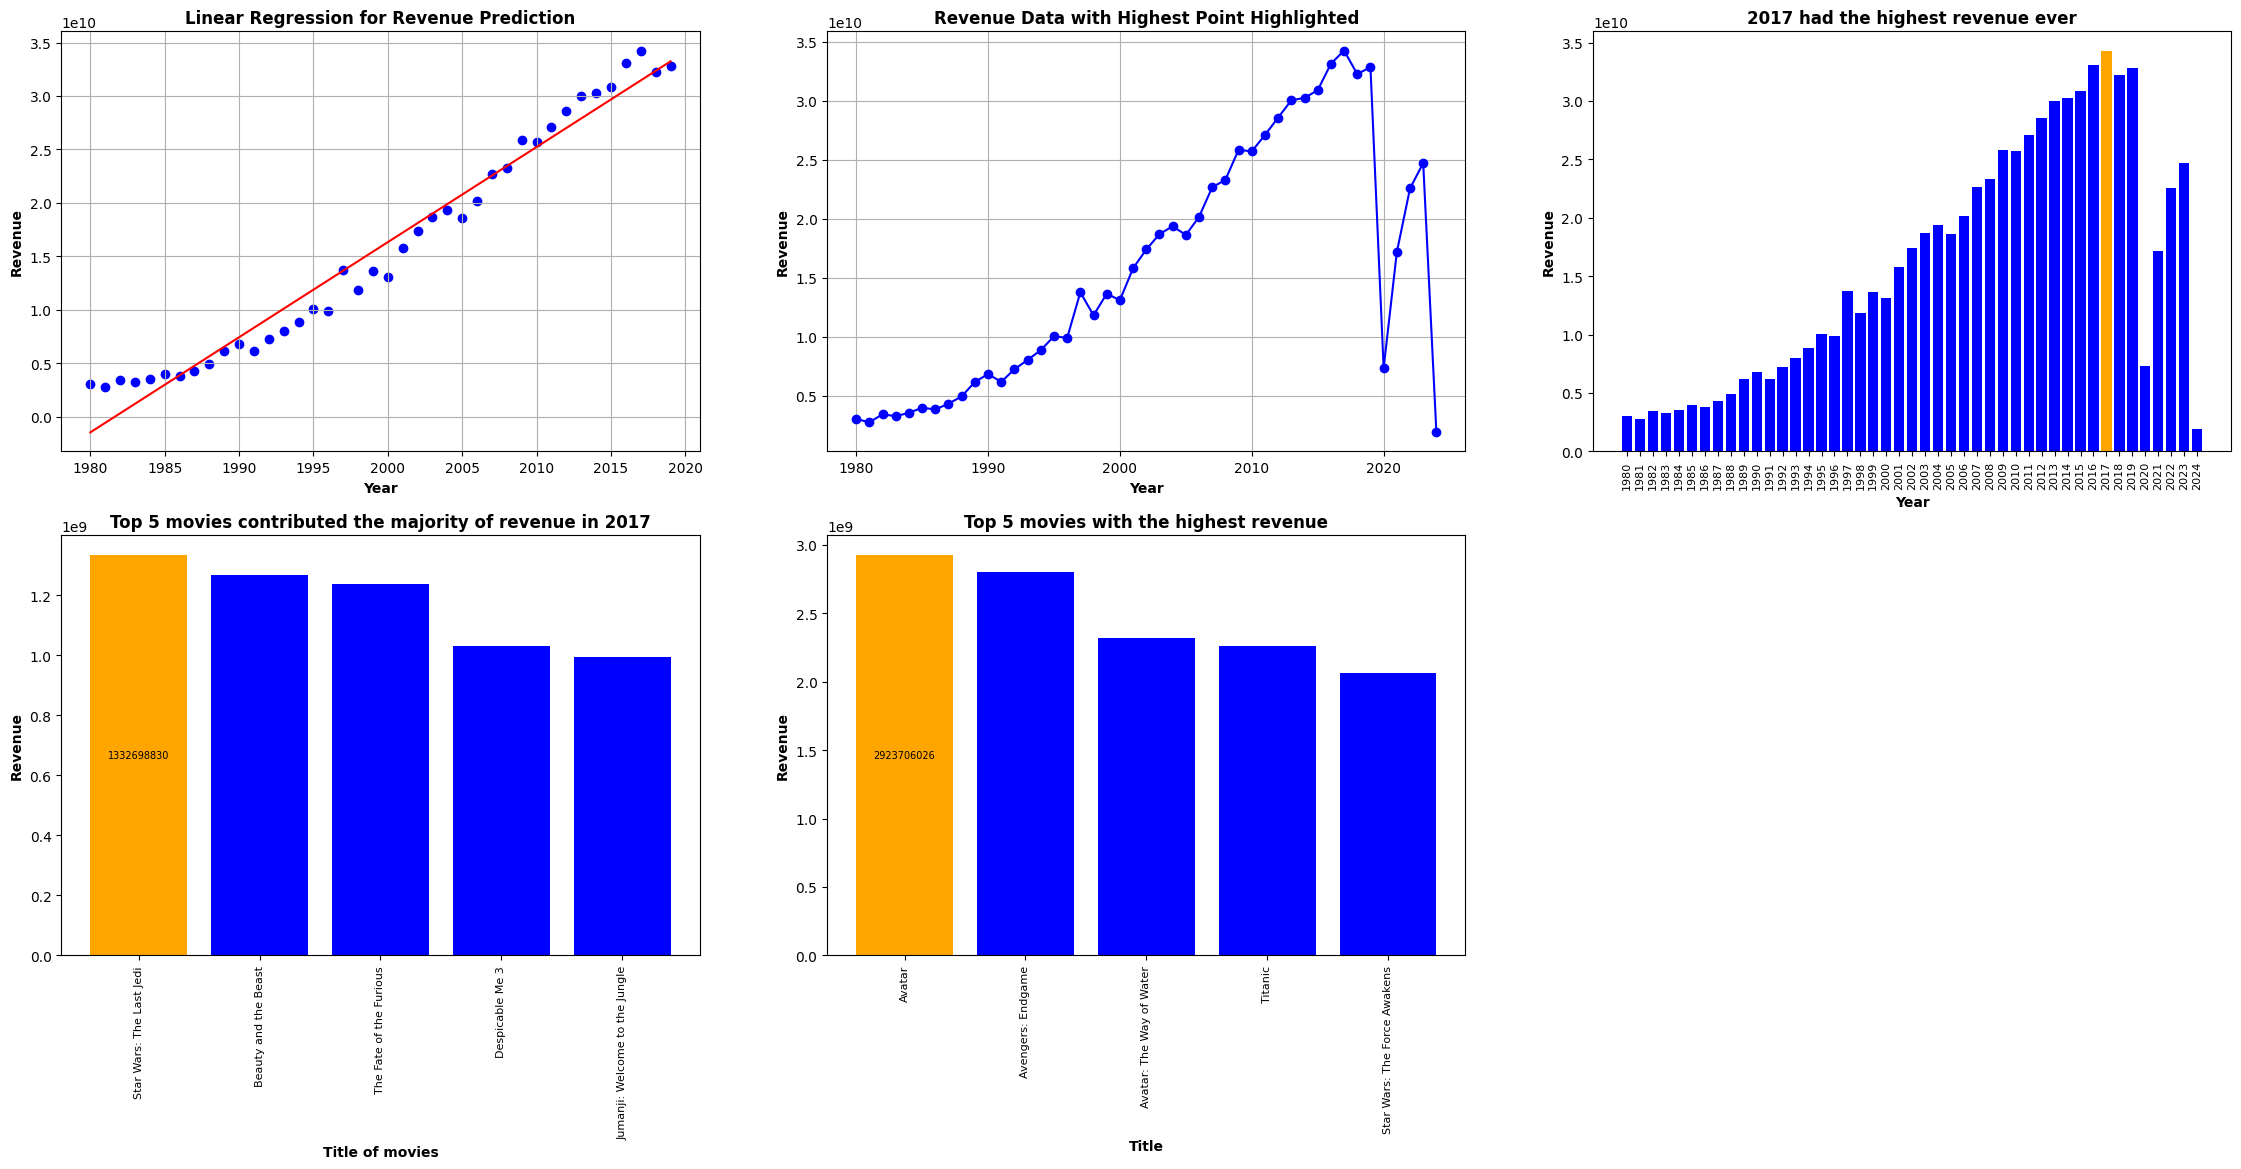

In [7]:
plt.figure(figsize = (28, 12))

#Linear regression
revenue_per_year = data.groupby('release_year')['revenue'].sum().reset_index()
revenue_per_year.columns = ['release_year', 'total_revenue']
revenue_per_year = revenue_per_year[revenue_per_year['release_year'] >= 1980]

predict_revenue = revenue_per_year[revenue_per_year['release_year'] < 2020]

X = predict_revenue['release_year'].values.reshape(-1, 1)
y = predict_revenue['total_revenue']

model = LinearRegression()
model.fit(X, y)

plt.subplot(2,3,1)
plt.scatter(X, y, color = 'blue', label = 'Actual Revenue')
plt.plot(X, model.predict(X), color = 'red', label = 'Predicted Revenue')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Revenue', fontweight = 'bold')
plt.title('Linear Regression for Revenue Prediction', fontweight = 'bold')
plt.grid(True)

#Decrease of 2020's revenue
sum_revenue = revenue_per_year['total_revenue']

plt.subplot(2,3,2)
plt.plot(revenue_per_year['release_year'], sum_revenue, 'bo', linestyle = '-')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue Data with Highest Point Highlighted', fontweight = 'bold')
plt.grid(True)

#Total revenue per year
plt.subplot(2,3,3)
plt.bar(revenue_per_year['release_year'].astype(str), sum_revenue, color = np.where(sum_revenue == sum_revenue.max(),'orange', 'blue'))
plt.title('2017 had the highest revenue ever', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Revenue', fontweight = 'bold')
plt.xticks(rotation = 90, fontsize = 8)

#Top movies of the year with the highest revenue (2017)
top_5_movies_2017 = data[data['release_year']  == 2017].sort_values(by = ['revenue'], ascending = False).head(5)
top_movie_2017 = top_5_movies_2017['revenue'].max()
top_revenue = top_5_movies_2017['revenue']

positions = range(len(top_5_movies_2017))

plt.subplot(2,3,4)
plt.bar(top_5_movies_2017['title'], top_revenue, color = np.where(top_revenue == top_revenue.max(),'orange', 'blue'))
plt.text(positions[0], top_movie_2017 / 2, top_movie_2017, ha = 'center', va = 'center', color = 'black', fontsize = 7)
plt.title('Top 5 movies contributed the majority of revenue in 2017', fontweight = 'bold')
plt.xlabel('Title of movies', fontweight = 'bold')
plt.ylabel('Revenue', fontweight = 'bold')
plt.xticks(fontsize = 8, rotation = 90)

#Top 5 movies
top_5_movies = data.sort_values(by = 'revenue', ascending = False).head(5)
top_5_revenue = top_5_movies['revenue']
top_1_revenue = top_5_movies['revenue'].max()

positions = range(len(top_5_movies))

plt.subplot(2,3,5)
plt.bar(top_5_movies['title'], top_5_revenue, color = np.where(top_5_revenue == top_5_revenue.max(),'orange', 'blue'))
plt.text(positions[0], top_1_revenue / 2, top_1_revenue, ha = 'center', va = 'center', color = 'black', fontsize = 7)
plt.title('Top 5 movies with the highest revenue', fontweight = 'bold')
plt.xlabel('Title', fontweight = 'bold')
plt.ylabel('Revenue', fontweight = 'bold')
plt.xticks(fontsize = 8, rotation = 90)

The film industry's revenue tends to grow according to linear regression. According to Figure 1, 2020 is expected to reach a revenue of 34 billion USD. However, due to the impact of the Covid-19 pandemic, the film industry's revenue decreased by 77% compared to 2019 (Figure 2).

Up to now, 2017 is the year with the highest revenue on IMDB, up to more than 34 billion USD (Figure 3). Among them, Star Wars: The Last Jedi, a movie with an average vote of only 6.8 points but contributed the highest revenue in 2017, up to more than 1.3 billion USD (Figure 4). However, from 1980 to 2024, the movie with the highest revenue is Avatar, a movie released in 2009 with revenue of nearly 3 billion USD (Figure 5).